<hr>

# **Agenda**

**The telecommunications industry is characterized by a dynamic market with high customer churn. Due to the availability of multiple service providers, customers can readily switch operators, leading to an average annual churn rate of 1-5%.  Furthermore, customer acquisition costs are significantly higher (5-10 times) compared to customer retention costs.  As a result, retaining high-value customers has become paramount for incumbent telecom companies.**

**To achieve this objective, telecom companies require the ability to identify customers at an elevated risk of churn.  By leveraging customer-level data, predictive models can be constructed to anticipate churn behavior.  This project will involve the analysis of such data from a leading telecommunications firm.  The goal is to develop these predictive models and subsequently identify the key factors associated with customer churn.**

<hr>

**Link to dataset: https://drive.google.com/file/d/1Pn1e1iymN6wzQhD_YE0Gtr88lnLvRn_n/view?usp=sharing**

<hr>

# **Step 1 - Load the libraries**

**Configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Basic Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

**Machine Learning Libraries**

In [ ]:
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

<hr>

# **Step 2 - Data Loading and Inspection Phase**

In [ ]:
df = pd.read_csv("customer_churn.csv")

**Data Inspection**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Insights**
  * **We have a lot of categorical values, this means we will have to do encoding**

<hr>

**Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Insights**
  * **Assumptions that there are no null values**
  * **There is no duplicates in the data, since we are having all unique customer ID**
  * **The `TotalCharges` column is having some ambiguity need to check**

In [ ]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

<hr>

**Dealing with Ambiguity**

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = "coerce")

**Shape Inspection**

In [ ]:
a = df.shape

print(f'Rows: {a[0]} & Columns: {a[1]}')

Rows: 7043 & Columns: 21


**Statistical Information of the data**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


<hr>

# **Step 3 - Data Preprocessing**

**Null Values Inspection**

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df = df.dropna()

**Duplicate Analysis**

In [ ]:
df.duplicated().sum()

0

<hr>

# **Step 4 - EDA**



# **Question 1**
  # **Extract all the records which are senior male citizen whose payment whose method is electronic check & store the result in 'senior_male_electronic**

In [ ]:
senior_male_electronic = df[(df['SeniorCitizen']==1) & (df['gender']=='Male') & (df['PaymentMethod']=='Electronic check')]

In [ ]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


#**Question 2**
  # **Monthly charges is more than 100$ and tenure more than 70 and storing the result in the customer_total_tenure**

In [ ]:
customer_total_tenure = df[(df['tenure'] > 70) & (df['MonthlyCharges'] > 100)]

In [ ]:
customer_total_tenure.shape

(175, 21)

# **Question 3**
  # **Extract all the customers whose contract is of two years, payment method is Mailed, check for the value of churn is 'yes' and store the result in the 'two_mail_year'**

In [ ]:
two_mail_year = df[(df['Contract'] == 'Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']== 'Yes')]

In [ ]:
two_mail_year.shape

(3, 21)

**Visualize**

Text(0.5, 1.0, 'Customers by contract')

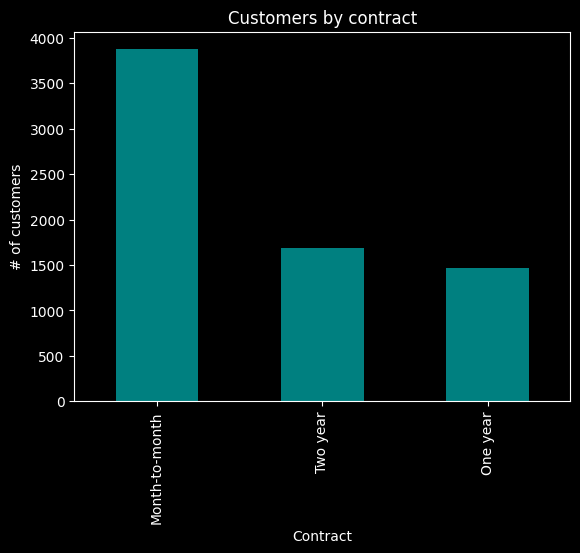

In [ ]:
ax = df['Contract'].value_counts().plot(kind = 'bar', color = 'teal')
ax.set_ylabel('# of customers')
ax.set_title('Customers by contract')

**Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.**

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

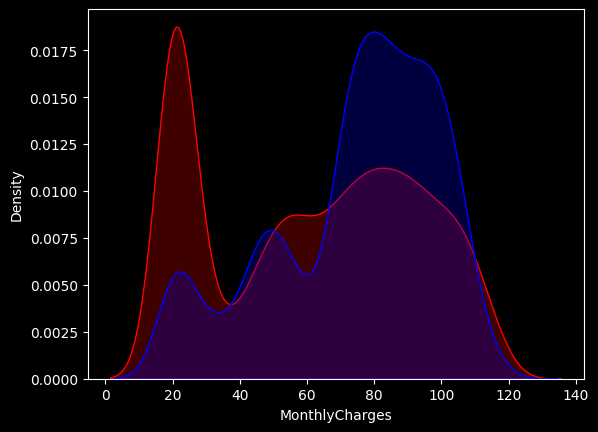

In [ ]:
sns.kdeplot(df.MonthlyCharges[(df['Churn']=='No')], color = 'Red', shade = True)
sns.kdeplot(df.MonthlyCharges[(df['Churn']=='Yes')], color = 'Blue', shade = True)


ax.legend(["Not Churn","Churn"],loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

<hr>

**Encoding**

In [ ]:
encoder = LabelEncoder()

In [ ]:
for x in df.columns:
  if df[x].dtype == 'object':
    df[x] = encoder.fit_transform(df[x])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df = df.drop('customerID', axis = 1)

<hr>

# **Step 4 - Feature Selection Technique**

<hr>

**Correlation**


<Axes: >

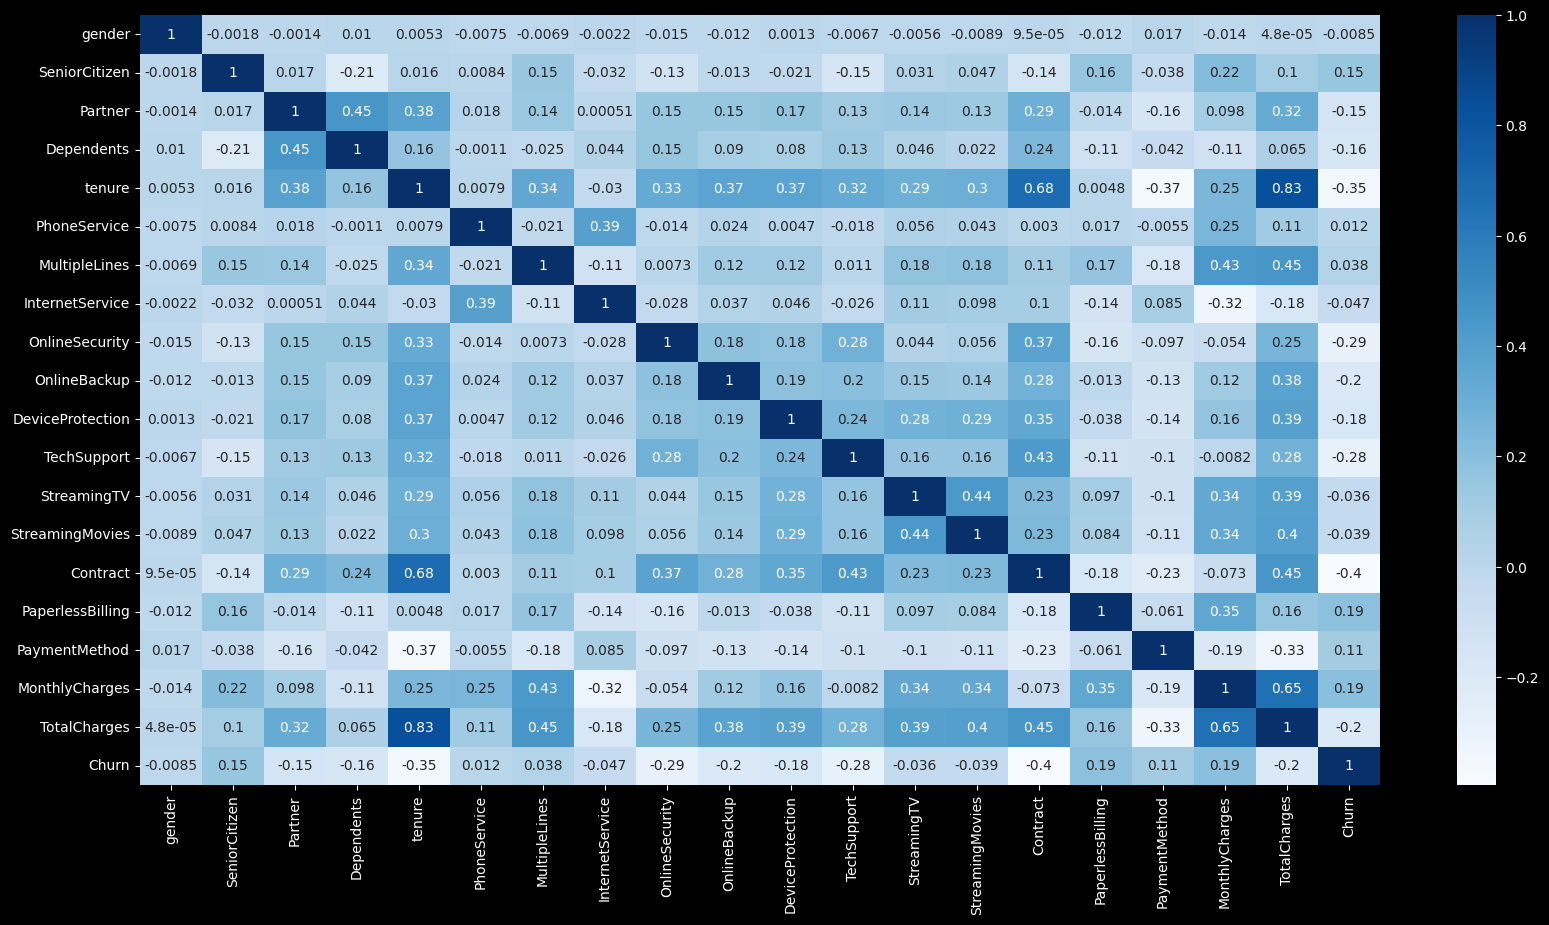

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

**Insights**
  * **Looking at the data here, we can clearly see that there is no such column that is having a very strong influence on the target column. Moreover, there are very less columns that are having a strong relationship with between them.**
  * **So, here with this insight, going ahead with VIF is a polarizing choice. Either if we want we can go ahead with the same, or if we want we can leave it as it is**

<hr>

**VIF (Variance Inflation Factor)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

**Grab the columns that are numerical in nature**

In [ ]:
col_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    col_list.append(x)

In [ ]:
col_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

**Implementation**

In [ ]:
# Need Data
X = df[col_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data

,Features,VIF
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


In [ ]:
df = df.drop("MonthlyCharges", axis = 1)

**Iteration 2**

In [ ]:
col_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    col_list.append(x)

# Need Data
X = df[col_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data

,Features,VIF
0,gender,1.936952
1,SeniorCitizen,1.343210
2,Partner,2.814039
3,Dependents,1.957317
4,tenure,13.942277
5,PhoneService,8.202506
6,MultipleLines,2.511962
7,InternetService,3.646896
8,OnlineSecurity,2.247428
9,OnlineBackup,2.454485


In [ ]:
df = df.drop("tenure", axis = 1)

**Iteration - 3**

In [ ]:
col_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    col_list.append(x)

# Need Data
X = df[col_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data

,Features,VIF
0,gender,1.919674
1,SeniorCitizen,1.341260
2,Partner,2.749816
3,Dependents,1.955831
4,PhoneService,8.200629
5,MultipleLines,2.499564
6,InternetService,3.491818
7,OnlineSecurity,2.228559
8,OnlineBackup,2.441964
9,DeviceProtection,2.617616


In [ ]:
df = df.drop("PhoneService", axis = 1)

**Iteration-4**

In [ ]:
col_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    col_list.append(x)

# Need Data
X = df[col_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data

,Features,VIF
0,gender,1.864278
1,SeniorCitizen,1.336778
2,Partner,2.739901
3,Dependents,1.949167
4,MultipleLines,2.492203
5,InternetService,2.529810
6,OnlineSecurity,2.196135
7,OnlineBackup,2.437734
8,DeviceProtection,2.616390
9,TechSupport,2.357595


In [ ]:
df = df.drop("TotalCharges", axis = 1)

<hr>

**Iteration 5**

In [ ]:
col_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    col_list.append(x)

# Need Data
X = df[col_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data

,Features,VIF
0,gender,1.864003
1,SeniorCitizen,1.324977
2,Partner,2.662983
3,Dependents,1.933842
4,MultipleLines,2.174970
5,InternetService,2.328254
6,OnlineSecurity,2.158788
7,OnlineBackup,2.277208
8,DeviceProtection,2.537876
9,TechSupport,2.348584


<hr>

# **Step 5 - Model Building and Evaluation**

**Divide the data**

In [ ]:
# Independent Columns
x = X

# Target Columns
y = df["Churn"]

In [ ]:
x.shape

(7032, 15)

**Splitting of the data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 43)

In [ ]:
x_train.shape, x_test.shape

((5274, 15), (1758, 15))

**Model Building**

In [ ]:
model = LogisticRegression()

# Fit the data
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3940,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3346,0,1,0,0,2,1,0,0,0,0,0,2,0,1,2
143,1,0,0,0,2,1,2,2,0,0,0,0,1,1,1
4204,1,1,0,0,0,1,0,2,0,0,0,2,0,1,2
4386,1,0,1,1,0,0,2,2,0,2,0,0,2,0,0


In [ ]:
# predict

pred = model.predict(x_test)

In [ ]:
len(pred)

1758

**Evaluation**

**Accuracy Score: This is a measure that tells you how many values very correctly predicted out of all the testing data**

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100}")

Accuracy Score: 77.24687144482367


In [ ]:
print(f"Error Rate: {(1 - accuracy_score(y_test, pred))*100}")

Error Rate: 22.75312855517634


**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, pred)

<img src = "https://imgs.search.brave.com/BR4P9p1EpodmgASQ0__ml5QDEBuLBV17CjBa7Ft-T3c/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9zdGF0/aWMuamF2YXRwb2lu/dC5jb20vdHV0b3Jp/YWwvbWFjaGluZS1s/ZWFybmluZy9pbWFn/ZXMvY29uZnVzaW9u/LW1hdHJpeC5wbmc"/>

In [ ]:
cm

array([[1151,  134],
       [ 266,  207]])

<hr>

**Classification Report**
  * **True Positive (TP): The actual value was positive, and the model predicted a positive value.**
  * **True Negative (TN): The actual value was negative, and the model predicted a negative value.**
  * **False Positive (FP) – Type I Error: The actual value was negative, but the model predicted a positive value. `Also known as the type I error.`**
  * **False Negative (FN) – Type II Error: he actual value was positive, but the model predicted a negative value. `Also known as the type II error`.**

<hr>

**Precision vs. Recall**
  * **Precision tells us how many of the correctly predicted cases actually turned out to be positive. `(TP / TP + FP)`. `This would determine whether our model is reliable or not.`**

  * **Recall tells us how many of the actual positive cases we were able to predict correctly with our model. `(TP / TP + FN)`. `This is used to make sure that the actual positive cases should not go undetected!`**







In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1285
           1       0.61      0.44      0.51       473

    accuracy                           0.77      1758
   macro avg       0.71      0.67      0.68      1758
weighted avg       0.76      0.77      0.76      1758



<hr>

**Learn about imbalanced data**